In [19]:
from unsupervised_bias_detection.clustering import BiasAwareHierarchicalKMeans
import pandas as pd

df = pd.read_csv('./data/twitter1516_final.csv')
df = df.drop(columns=['tweet_id','tweet'])
df.head()


,label,length,#URLs,#mentions,#hashs,verified,#followers,user_engagement,sentiment_score
0,1,95,2,0,0,1,15375121,72.567469,-0.3182
1,1,118,1,1,0,1,3673898,55.294333,0.8398
2,0,133,0,0,1,1,1274260,32.033388,-0.7269
3,1,96,1,0,0,1,13955752,64.548896,-0.3400
4,1,96,2,0,0,1,189683,24.726166,0.0000


In [20]:
targetColumn = 'label'
X = df.drop(columns=[targetColumn])
y = df[targetColumn]

In [22]:
iter=10
clusters=40
hbac = BiasAwareHierarchicalKMeans(n_iter=iter, min_cluster_size=clusters).fit(X, y)
hbac.n_clusters_

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but BiasAwareHierarchicalKMeans was fitted without feature names
  warnings.warn(


9

In [24]:
# cluster with most bias has label 0
df_most_biased_cluster = df[hbac.labels_ == 0]
df_other = df[hbac.labels_ != 0]

df_cluster1 = df[hbac.labels_ == 1]
df_cluster2 = df[hbac.labels_ == 2]
df_cluster3 = df[hbac.labels_ == 3]
df_cluster4 = df[hbac.labels_ == 4]

df_most_biased_cluster['Cluster'] = '0'
df_cluster1['Cluster'] = '1'
df_cluster2['Cluster'] = '2'
df_cluster3['Cluster'] = '3'
df_cluster4['Cluster'] = '4'

/var/folders/v8/64zc34sn3b95klfm660085h80000gn/T/ipykernel_4833/4291840777.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_most_biased_cluster['Cluster'] = '0'
/var/folders/v8/64zc34sn3b95klfm660085h80000gn/T/ipykernel_4833/4291840777.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster1['Cluster'] = '1'
/var/folders/v8/64zc34sn3b95klfm660085h80000gn/T/ipykernel_4833/4291840777.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [26]:
full_df = pd.concat([df_most_biased_cluster, df_cluster1, df_cluster2, df_cluster3, df_cluster4], ignore_index=True)
full_df.head()

,label,length,#URLs,#mentions,#hashs,verified,#followers,user_engagement,sentiment_score,Cluster
0,1,95,2,0,0,1,15375121,72.567469,-0.3182,0
1,1,96,1,0,0,1,13955752,64.548896,-0.3400,0
2,1,63,1,0,0,1,11422844,16.157140,-0.6486,0
3,1,98,2,0,1,1,9791437,76.215971,-0.1531,0
4,0,95,1,0,0,1,11774920,56.962356,-0.7845,0


<Axes: ylabel='Cluster'>

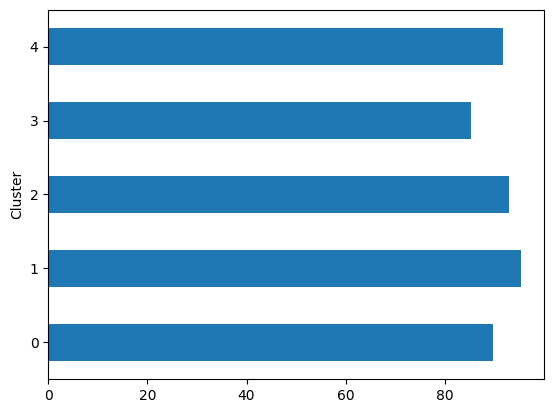

In [30]:
full_df.groupby('Cluster')['length'].mean().plot.barh()

<Axes: ylabel='Cluster'>

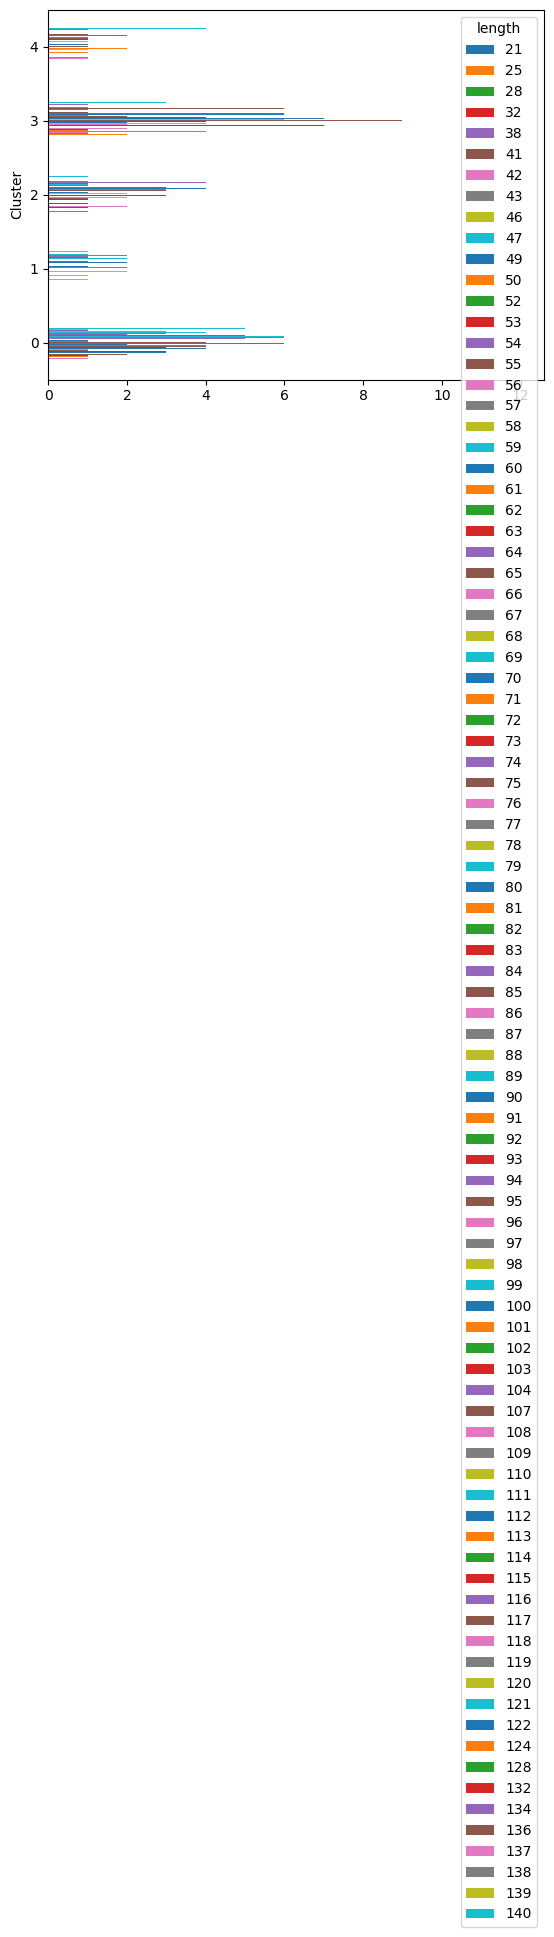

In [28]:
full_df.groupby('Cluster')['length'].value_counts().unstack().plot.barh()